https://www.reddit.com/r/probabilitytheory/comments/66fwqb/probably_that_i_wont_roll_a_1_over_10_rolls_of_2/

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [15]:
def die():
    return np.random.choice(np.arange(6),size=1,replace=False)[0]
die()

5

# test the die to see if it is fair

In [16]:
r = []
for ii in range(500):
    r.append(die())
r = np.array(r).reshape(-1,)
r.shape

(500,)

(array([ 95.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  77.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  85.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  82.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,  83.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  78.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
         1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
         2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
         3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
         4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ]),
 <a list of 50 Patch objects>)

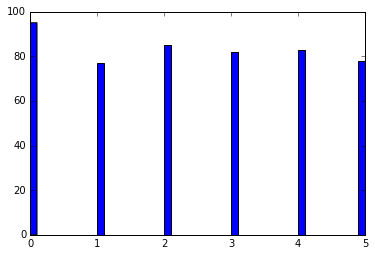

In [17]:
plt.hist(r, bins=50)

In [49]:
n = 1000;dist=[]
for times in range(100):# try this 100 times to have a confidence interval of the probability
    result=[]
    for ii in range(n):# repeat the experiment n times so that we could estimate it by the law of large numbers
        roll_10=[]
        for jj in range(10):# this is the experiment: roll two dices 10 times
            roll_10.append([die(),die()])
        result.append(roll_10)# record one experiment
    result = np.array(result)# record one try
    check = []
    for roll in result:# to see if we get any ones
        check.append(np.sum(roll == 1)<1)
    dist.append(np.sum(check)/n)# compute the probability we observe in one try of the many experiments

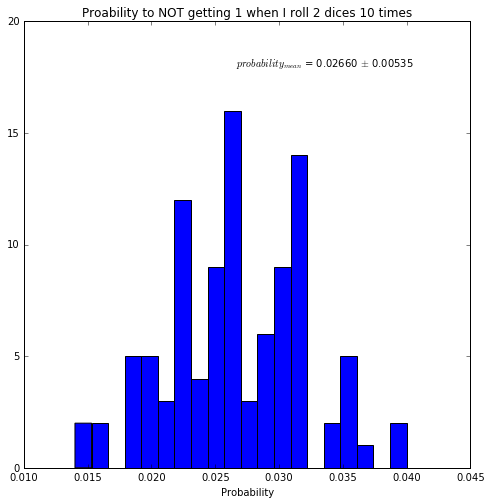

In [54]:
fig, ax = plt.subplots(figsize=(8,8))
_=ax.hist(dist,bins=20)
_=ax.set(xlabel='Probability',title='Proability to NOT getting 1 when I roll 2 dices 10 times',ylim=(0,20))
_=ax.annotate('$probability_{mean}$ = %.5f $\pm$ %.5f'%(np.mean(dist),np.std(dist)),xy=(np.mean(dist),18))